In [1]:
# export
TEST = 'test'

In [2]:
nbs = 'fastai_docs/dev_nb/'

# Export

In [38]:
import fastai
print (fastai.__version__)

1.0.50.post1


In [3]:
!python $nbs/notebook2script.py 00_exports.ipynb

Converted 00_exports.ipynb to nb_00.py


In [4]:
!ls

00_exports.ipynb fastai_docs      ml-interview
course-v3        machine-learning nb_00.py


In [5]:
#export
from nb_00 import *
import operator

def test(a,b,cmp,cname=None) :
    if cname is None: cname=cmp.__name__
    assert cmp(a,b),f'{cname}:\n{a}\n{b}'

def test_eq(a,b): test(a,b,operator.eq,'==')

In [6]:
test_eq(TEST,'test')

In [58]:
import os

In [68]:
#export 
from pathlib import Path
from IPython.core.debugger import set_trace
from fastai import datasets
import pickle, gzip, math, torch, matplotlib as mpl
import matplotlib.pyplot as plt 
from torch import tensor 

MNIST_URL='http://deeplearning.net/data/mnist/mnist.pkl.gz'

In [83]:
path = os.getcwd()

In [84]:
!wget $MNIST_URL -P $path

--2019-04-20 16:42:27--  http://deeplearning.net/data/mnist/mnist.pkl.gz
Resolviendo deeplearning.net (deeplearning.net)... 132.204.26.28
Conectando con deeplearning.net (deeplearning.net)[132.204.26.28]:80... conectado.
Petici'on HTTP enviada, esperando respuesta... 200 OK
Longitud: 16168813 (15M) [application/x-gzip]
Grabando a: "/Users/cristian/projects/ml/mnist.pkl.gz"

mnist.pkl.gz        100%[===================>]  15.42M  4.65MB/s    en 3.3s    

2019-04-20 16:42:31 (4.65 MB/s) - "/Users/cristian/projects/ml/mnist.pkl.gz" guardado [16168813/16168813]



In [87]:
with gzip.open(path+'/mnist.pkl.gz', 'rb') as f:
    ((x_train, y_train), (x_valid, y_valid), _) = pickle.load(f, encoding='latin-1')

In [88]:
x_train, y_train, x_valid, y_valid = map(tensor,(x_train, y_train, x_valid, y_valid))

In [90]:
n,c = x_train.shape

In [91]:
x_train, x_train.shape, y_train, y_train.shape, y_train.min(), y_train.max()

(tensor([[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]),
 torch.Size([50000, 784]),
 tensor([5, 0, 4,  ..., 8, 4, 8]),
 torch.Size([50000]),
 tensor(0),
 tensor(9))

In [93]:
assert n==y_train.shape[0] == 50000
test_eq(c, 28*28)
test_eq(y_train.min(),0)
test_eq(y_train.max(),9)

In [94]:
mpl.rcParams['image.cmap'] = 'gray'

In [95]:
img = x_train[0]
img.view(28,28).type()

'torch.FloatTensor'

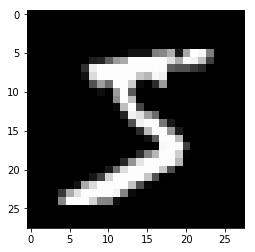

In [96]:
plt.imshow(img.view((28,28)))

## Initial pytjhon model 

In [97]:
weights = torch.randn(784,10)
bias = torch.zeros(10)

### Matrix multiplication

In [121]:
def matmul(a,b):
    ar, ac = a.shape
    br, bc = b.shape
    assert ac==br
    c = torch.zeros(ar,bc)
    for i in range(ar):
        for j in range(bc):
            for k in range(ac):
                c[i,j] += a[i,k] * b[k,j]
    return c 

In [122]:
m1 = x_valid[:5]
m2 = weights

In [123]:
m1.shape, m2.shape

(torch.Size([5, 784]), torch.Size([784, 10]))

In [124]:
%time t1=matmul(m1,m2)

CPU times: user 1.08 s, sys: 12.5 ms, total: 1.1 s
Wall time: 1.16 s


In [102]:
t1.shape

torch.Size([5, 10])

#### Elementwise ops

In [103]:
a = tensor([10.,6.,-4.])
b = tensor([2., 8., 7.])
a+b

tensor([12., 14.,  3.])

In [105]:
(a<b).float().mean()

tensor(0.6667)

Frobenius norm

In [113]:
m = tensor([[1.,2,3],[4,5,6],[6,8,9]]) ; m

tensor([[1., 2., 3.],
        [4., 5., 6.],
        [6., 8., 9.]])

In [115]:
(m*m).sum().sqrt()

tensor(16.4924)

In [125]:
def matmul(a,b):
    ar, ac = a.shape
    br, bc = b.shape
    assert ac==br
    c = torch.zeros(ar,bc)
    for i in range(ar):
        for j in range(bc):
            c[i,j] += (a[i,:] * b[:,j]).sum()
    return c 

In [126]:
%timeit -n 10 _=matmul(m1,m2)

2.27 ms ± 668 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [127]:
#export
def near(a,b): return torch.allclose(a,b,rtol=1e-3,atol=1e-5)
def test_near(a,b): test(a,b,near)

In [128]:
test_near(t1,matmul(m1,m2))

### Broadcasting

In [129]:
a

tensor([10.,  6., -4.])

In [130]:
a>0

tensor([1, 1, 0], dtype=torch.uint8)

In [132]:
c = tensor([10.,20,30]) ; c

tensor([10., 20., 30.])

In [133]:
m

tensor([[1., 2., 3.],
        [4., 5., 6.],
        [6., 8., 9.]])

In [134]:
m+c

tensor([[11., 22., 33.],
        [14., 25., 36.],
        [16., 28., 39.]])

In [136]:
m*c

tensor([[ 10.,  40.,  90.],
        [ 40., 100., 180.],
        [ 60., 160., 270.]])

In [137]:
t1

tensor([[-14.0382,  -7.4186,   9.0084,  -2.1522,   4.9038,  -0.3571,  -6.9361,
           0.7169,  -8.8458,  -6.3519],
        [ -2.0644,   5.0809,  18.2207,   2.9466,   8.7000,  10.9215,  -5.5341,
           0.4586,  -6.2027,  -5.2718],
        [-12.3689,  -3.8239,  15.4103,  -9.3131, -13.5903,  -5.4227,   2.7069,
          -1.6261,   4.6472,  -2.9059],
        [ -4.4963, -13.8908,  20.7457,  -2.4952,   1.6297,   1.2435,  13.6091,
           7.7169,  -4.2160,  -4.9612],
        [ -9.6541,  -8.9254,  12.3396,  -0.3313,  -3.6320,   2.5164,  -2.6793,
          -0.4782,  -6.0452,  -1.0550]])

In [141]:
t = c.expand_as(m); t

tensor([[10., 20., 30.],
        [10., 20., 30.],
        [10., 20., 30.]])

In [142]:
t.storage()

 10.0
 20.0
 30.0
[torch.FloatStorage of size 3]

In [144]:
t.stride(), t.shape

((0, 1), torch.Size([3, 3]))

In [145]:
m.stride(), m.shape

((3, 1), torch.Size([3, 3]))

#### Unsqueeze

In [146]:
c

tensor([10., 20., 30.])

In [155]:
c.unsqueeze(1), c.unsqueeze(1).shape, c.unsqueeze(0), c.unsqueeze(0).shape

(tensor([[10.],
         [20.],
         [30.]]),
 torch.Size([3, 1]),
 tensor([[10., 20., 30.]]),
 torch.Size([1, 3]))

In [154]:
c[:,None],c[:,None].shape,c[None,:],c[None,:].shape

(tensor([[10.],
         [20.],
         [30.]]),
 torch.Size([3, 1]),
 tensor([[10., 20., 30.]]),
 torch.Size([1, 3]))

In [157]:
c[:,None].expand_as(m)

tensor([[10., 10., 10.],
        [20., 20., 20.],
        [30., 30., 30.]])

##### Matmul with broadcasting

In [190]:
def matmul(a,b):
    ar, ac = a.shape
    br, bc = b.shape
    assert ac==br
    c = torch.zeros(ar,bc)
    for i in range(ar):
#         for j in range(bc):
            c[i] += (a[i][:,None] * b).sum(dim=0)
    return c 

In [164]:
c

tensor([10., 20., 30.])

In [165]:
m

tensor([[1., 2., 3.],
        [4., 5., 6.],
        [6., 8., 9.]])

In [186]:
m[1][:,None]

tensor([[4.],
        [5.],
        [6.]])

In [185]:
m[1].unsqueeze(-1)

tensor([[4.],
        [5.],
        [6.]])

In [174]:
(c[:,None]*m)

tensor([[ 10.,  20.,  30.],
        [ 80., 100., 120.],
        [180., 240., 270.]])

In [177]:
(c[:,None]*m).sum(dim=0)

tensor([270., 360., 420.])

In [191]:
%timeit -n 10 _=matmul(m1,m2)

408 µs ± 104 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [192]:
test_near(t1,matmul(m1,m2))

## Broadcasting rules 

In [194]:
c[None,:], c[None,:].shape

(tensor([[10., 20., 30.]]), torch.Size([1, 3]))

In [195]:
c[:,None],c[:,None].shape

(tensor([[10.],
         [20.],
         [30.]]), torch.Size([3, 1]))

In [196]:
c[None,:] * c[:, None]

tensor([[100., 200., 300.],
        [200., 400., 600.],
        [300., 600., 900.]])

In [201]:
c[None], c[None,:]

(tensor([[10., 20., 30.]]), tensor([[10., 20., 30.]]))

In [202]:
c[None] > c[:,None]


tensor([[0, 1, 1],
        [0, 0, 1],
        [0, 0, 0]], dtype=torch.uint8)

## Einstein Summation

`einsum`

In [ ]:
# c[i,j] += a[i,k] * b[k,j]
# ik,kj->ij

# c[i,j] = (a[i,:] * b[:,j]).sum()

In [204]:
def matmul(a,b): return torch.einsum('ik,kj->ij', a, b)

In [209]:
%timeit -n 10 _=matmul(m1, m2)

119 µs ± 73.3 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
